In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [41]:
df = pd.read_csv("file.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [42]:
df.shape

(52955, 20)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52955 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null 

In [44]:
df.isna().sum()

CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
df.describe()

,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [47]:
# hanya categorical data
df.describe(exclude = np.number)

,Gender,Location,Transaction_Date,Product_SKU,Product_Description,Product_Category,Coupon_Status,Date,Coupon_Code
count,52924,52924,52924,52924,52924,52955,52924,52924,52555
unique,2,5,365,1145,404,21,3,365,48
top,F,Chicago,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,Clicked,11/27/2019,SALE20
freq,33007,18380,335,3511,3511,18126,26926,335,6373


## Cleaning Data

In [50]:
df2 = df.drop(["CustomerID", "Coupon_Code", "Product_Description", "Transaction_ID", "Product_SKU"], axis=1)
df2

,Gender,Location,Tenure_Months,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
0,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
1,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
2,M,Chicago,12.0,2019-01-01,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
3,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0
4,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,NaN,NaN,NaN,NaN,Gift Cards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,20.0
52951,NaN,NaN,NaN,NaN,Notebooks & Journals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,20.0
52952,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10.0
52953,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,20.0


In [52]:
df3 = df2.dropna()
df3

,Gender,Location,Tenure_Months,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
0,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,10.0
1,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,10.0
2,M,Chicago,12.0,2019-01-01,Nest-USA,2.0,122.77,6.5,Not Used,0.10,1/1/2019,4500.0,2424.50,1,10.0
3,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,81.50,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,10.0
4,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,F,California,8.0,2019-03-10,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,30.0
52920,M,Chicago,34.0,2019-03-28,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,30.0
52921,M,California,15.0,2019-10-06,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,10.0
52922,M,California,15.0,2019-10-06,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,10.0


In [54]:
df3.shape

(52524, 15)

In [56]:
df3.isnull().sum()

Gender              0
Location            0
Tenure_Months       0
Transaction_Date    0
Product_Category    0
Quantity            0
Avg_Price           0
Delivery_Charges    0
Coupon_Status       0
GST                 0
Date                0
Offline_Spend       0
Online_Spend        0
Month               0
Discount_pct        0
dtype: int64

In [58]:
df3['Transaction_Date'] = pd.to_datetime(df3['Transaction_Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

C:\Users\userr\AppData\Local\Temp\ipykernel_18164\3118525459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Transaction_Date'] = pd.to_datetime(df3['Transaction_Date'])
C:\Users\userr\AppData\Local\Temp\ipykernel_18164\3118525459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3['Date'])


In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52923
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Gender            52524 non-null  object        
 1   Location          52524 non-null  object        
 2   Tenure_Months     52524 non-null  float64       
 3   Transaction_Date  52524 non-null  datetime64[ns]
 4   Product_Category  52524 non-null  object        
 5   Quantity          52524 non-null  float64       
 6   Avg_Price         52524 non-null  float64       
 7   Delivery_Charges  52524 non-null  float64       
 8   Coupon_Status     52524 non-null  object        
 9   GST               52524 non-null  float64       
 10  Date              52524 non-null  datetime64[ns]
 11  Offline_Spend     52524 non-null  float64       
 12  Online_Spend      52524 non-null  float64       
 13  Month             52524 non-null  int64         
 14  Discount_pct      5252

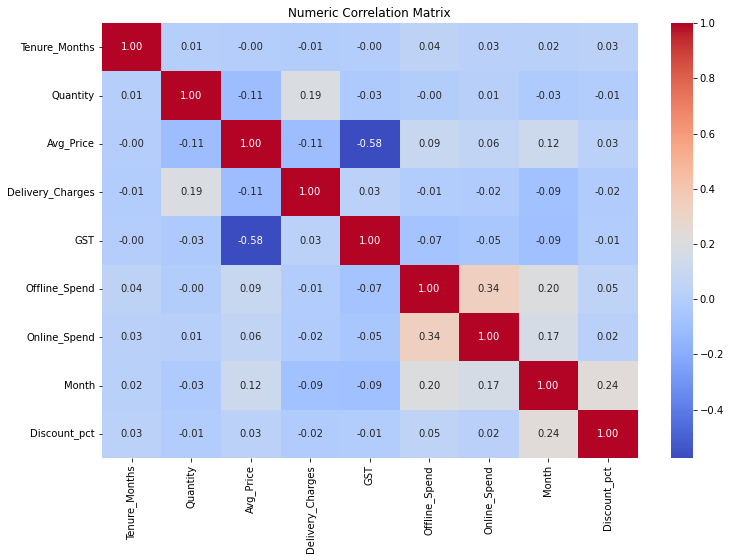

In [63]:
# Select only numeric columns
numeric_columns = df3.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric variables
numeric_correlation_matrix = numeric_columns.corr()

# Plot the heatmap for numeric variables
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numeric Correlation Matrix')
plt.show()

In [68]:
df3["Coupon_Status"].unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [71]:
from pivottablejs import pivot_ui
def pivot_ui(df, **kwargs):
    import pivottablejs
    class _DataFrame(pd.DataFrame):
        def to_csv(self, **kwargs):
            return super().to_csv(**kwargs).replace("\r\n", "\n")
    return pivottablejs.pivot_ui(_DataFrame(df), **kwargs)

pivot_ui(df3)

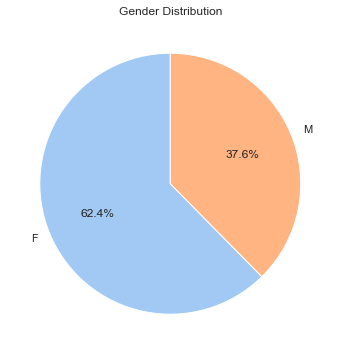

In [107]:
gender = df3['Gender'].value_counts()

# Membuat pie chart dengan Seaborn
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')

plt.show()

[Text(0, 0, '18380'),
 Text(0, 0, '16136'),
 Text(0, 0, '11173'),
 Text(0, 0, '4503'),
 Text(0, 0, '2732')]

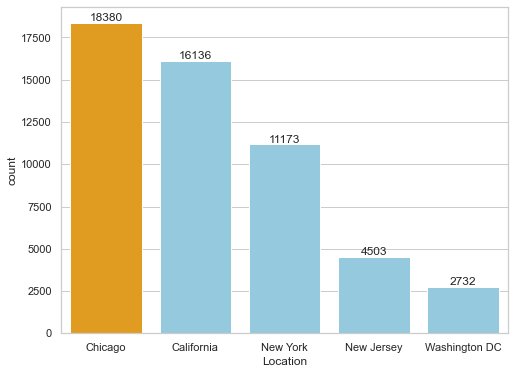

In [120]:
palette_colors = {'A': 'orange'}
palette_colors.update({chr(65 + i): 'skyblue' for i in range(1, 26)})

fig, ax = plt.subplots(figsize=(8, 6))
# Membuat countplot dengan warna khusus untuk setiap kategori
ax = sns.countplot(data=df, x='Location', palette=palette_colors.values())
ax.bar_label(ax.containers[0])

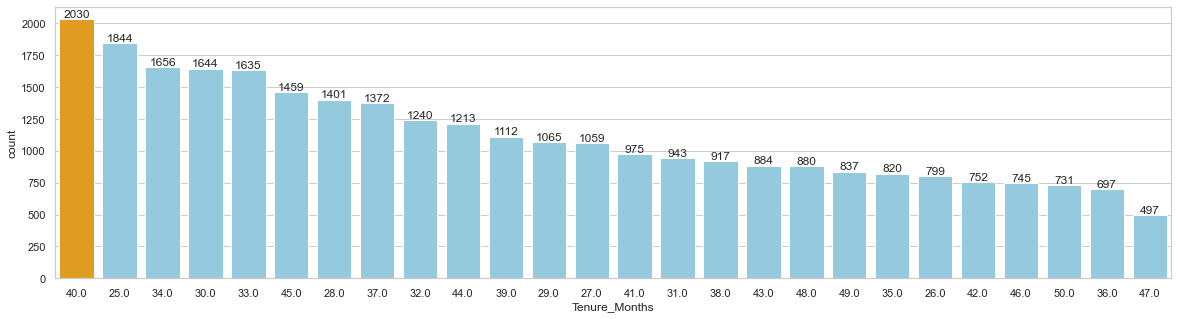

In [154]:
palette_colors = {'A': 'orange'}
palette_colors.update({chr(65 + i): 'skyblue' for i in range(1, 26)})

# Filter values greater than
tenure_month_filtered = df3[df3['Tenure_Months'] > 24]

# Create a count plot
plt.figure(figsize=(20, 5))
ax = sns.countplot(x='Tenure_Months', data=tenure_month_filtered, order=tenure_month_filtered['Tenure_Months'].value_counts().index, palette=palette_colors.values())
ax.bar_label(ax.containers[0])

plt.show()

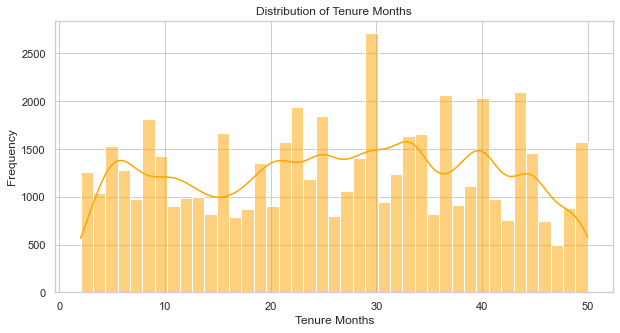

In [131]:
# Assuming 'Tenure_Months' is a numeric column in your DataFrame
plt.figure(figsize=(10, 5))
sns.histplot(df3['Tenure_Months'], kde=True, color='orange')

plt.title('Distribution of Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Frequency')

plt.show()

In [141]:
# create new column Year
df3["Transaction_Date"].dt.year.unique()

array([2019], dtype=int64)

C:\Users\userr\AppData\Local\Temp\ipykernel_18164\355584179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Month"] = df3["Month"].astype(int)


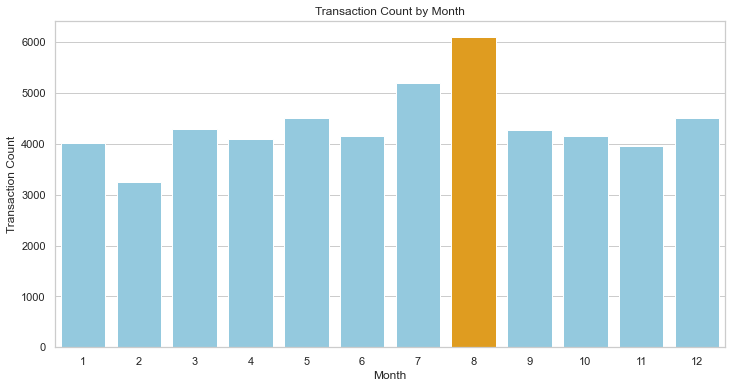

In [178]:
df3["Month"].unique()
df3["Month"] = df3["Month"].astype(int)

# Customize colors for each month
custom_colors = ['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 
                  'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue','skyblue']

# Plot count of transactions for each month with specified colors
plt.figure(figsize=(12, 6))
sns.countplot(data=df3, x='Month', palette=custom_colors)
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Month')

plt.show()

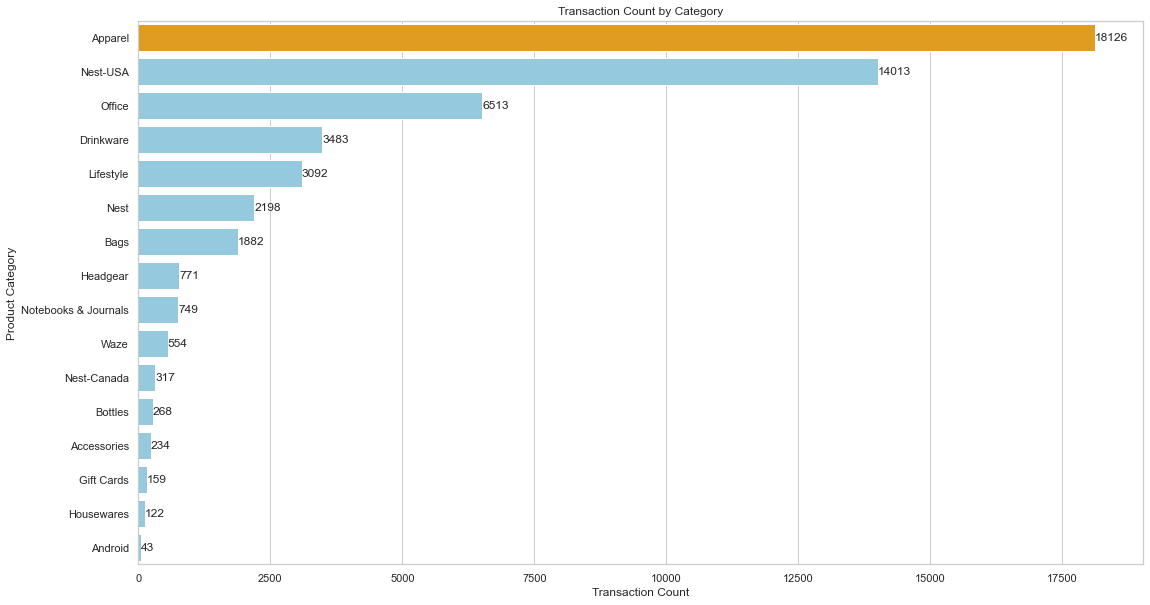

In [196]:
# Customize colors for each month
custom_colors = ['orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 
                'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue',
                'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue',
                'skyblue']

sorted_categories = df3['Product_Category'].value_counts().index
df_sorted = df3.sort_values(by='Product_Category', key=lambda x: x.map({cat: i for i, cat in enumerate(sorted_categories)}))

# Create a horizontal count plot
plt.figure(figsize=(18, 10))
ax = sns.countplot(data=df_sorted, y='Product_Category', palette=custom_colors)
ax.bar_label(ax.containers[0], fmt='%d')  # Display the count on each bar
plt.xlabel('Transaction Count')
plt.ylabel('Product Category')
plt.title('Transaction Count by Category')

plt.show()

Text(0.5, 1.0, 'Kuantitas')

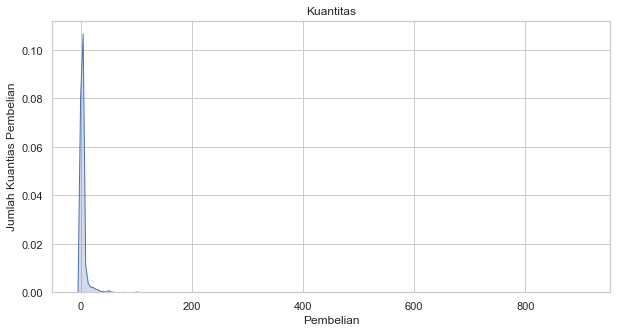

In [208]:
plt.figure(figsize=(10, 5))
ax = sns.kdeplot(x = df3["Quantity"], fill = True)
plt.xlabel('Pembelian')
plt.ylabel('Jumlah Kuantias Pembelian')
plt.title('Kuantitas')

In [210]:
df3["Quantity"].describe()

count    52524.000000
mean         4.500171
std         20.159985
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        900.000000
Name: Quantity, dtype: float64

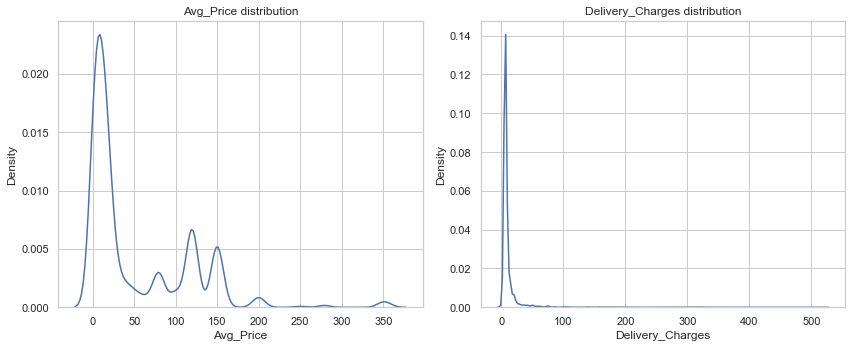

In [212]:
# see distribution

fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 

# kde plot on the top-left
sns.kdeplot(df3["Avg_Price"], ax = axs[0])
axs[0].set_title('Avg_Price distribution')

# kde plot on the top-right
sns.kdeplot(df3["Delivery_Charges"], ax = axs[ 1])
axs[1].set_title('Delivery_Charges distribution')

plt.tight_layout()  
plt.show()

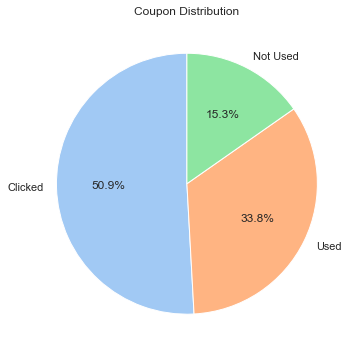

In [214]:
coupon = df3['Coupon_Status'].value_counts()

# Membuat pie chart dengan Seaborn
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")
plt.pie(coupon, labels=coupon.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Coupon Distribution')

plt.show()

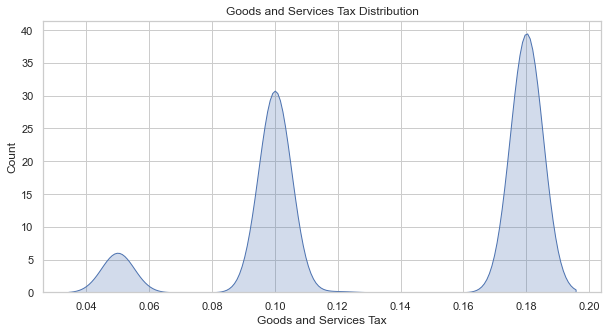

In [218]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x = df3["GST"], fill = True)
plt.xlabel('Goods and Services Tax')
plt.ylabel('Count')
plt.title('Goods and Services Tax Distribution')
plt.show()

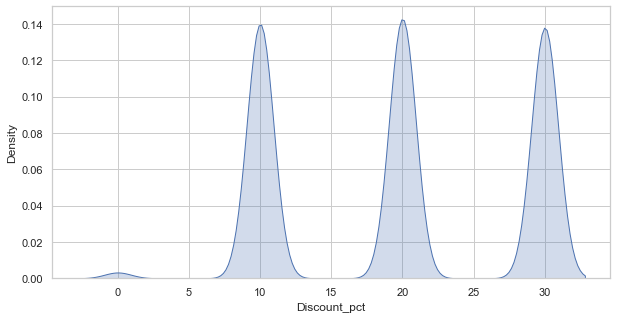

In [225]:
# fill nan value with zero
df["Discount_pct"].fillna(0, inplace = True)
plt.figure(figsize=(10, 5))
sns.kdeplot(df["Discount_pct"], fill = True)
plt.show() 

## Analisis Hubungan

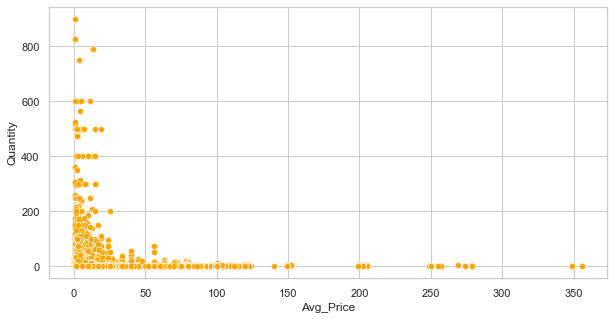

In [229]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = "Avg_Price", y = "Quantity", data = df3, color='orange')
plt.show()

Terlihat bahwa:

harga rata-rata meningkat, jumlah yang terjual berkurang 

Ada hubungan terbalik antara jumlah dan harga rata-rata

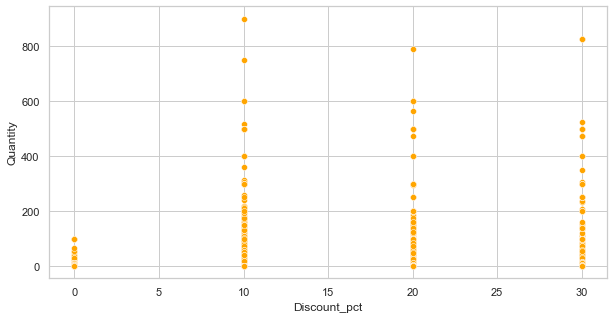

In [234]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = 'Discount_pct', y = 'Quantity', data = df, color='orange')
plt.show()

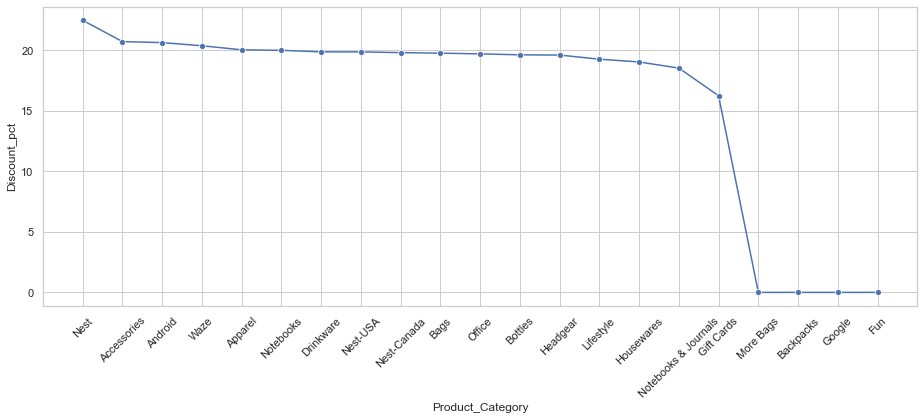

In [237]:
# Category VS discount

# Group by 'Product_Category' and calculate the mean of 'Discount_pct'
avg_discount_per_category = df.groupby("Product_Category")["Discount_pct"].mean().reset_index().sort_values(by = "Discount_pct", ascending = False)

# set size to figure
plt.figure(figsize = (13,6))

# Create a line plot
sns.lineplot(x = "Product_Category", y = "Discount_pct", data = avg_discount_per_category,  marker = 'o')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

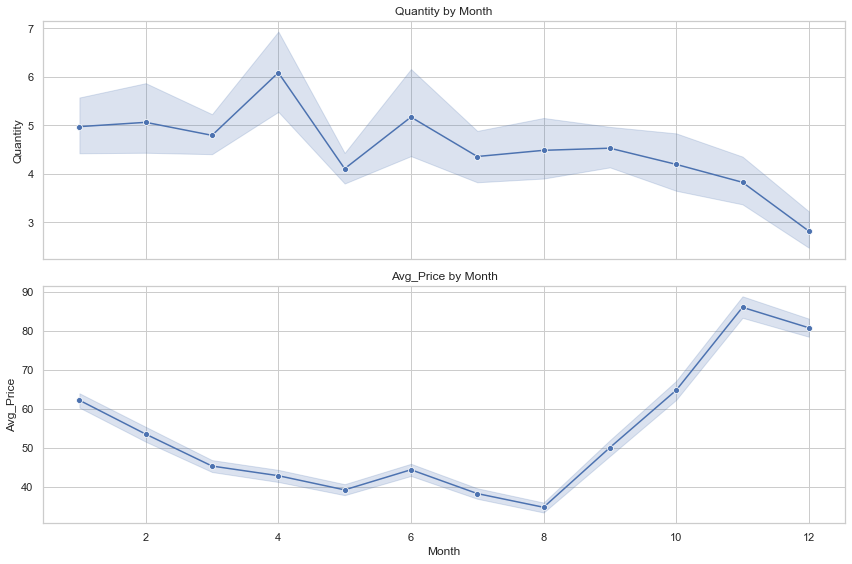

In [252]:
# Assuming 'Month', 'Quantity', and 'Avg_Price' are columns in your DataFrame df3
# If they are not present, adjust the column names accordingly

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Line plot for Quantity by Month
sns.lineplot(x="Month", y="Quantity", data=df3, ax=axs[0], marker='o')
axs[0].set_title('Quantity by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Quantity')

# Line plot for Avg_Price by Month
sns.lineplot(x="Month", y="Avg_Price", data=df3, ax=axs[1], marker='o')
axs[1].set_title('Avg_Price by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Avg_Price')

plt.tight_layout()
plt.show()


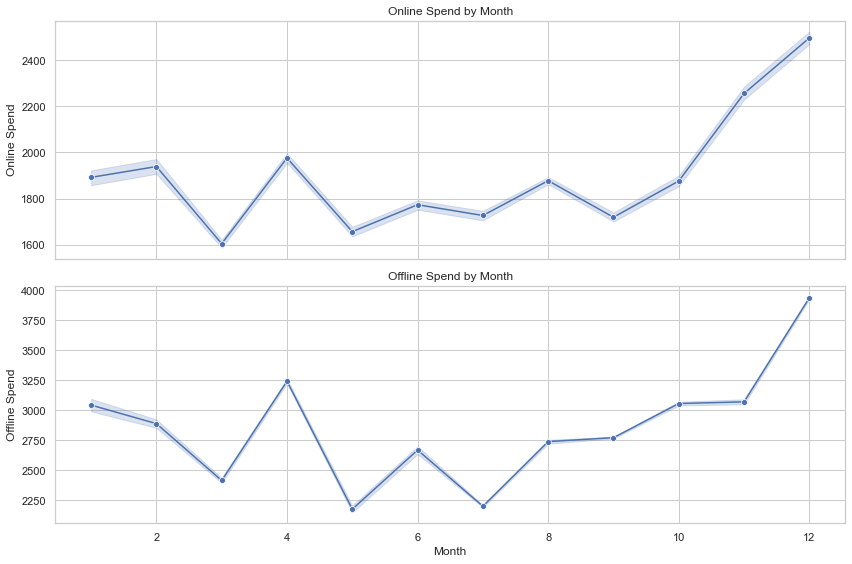

In [307]:
# Assuming 'Month', 'Quantity', and 'Avg_Price' are columns in your DataFrame df3
# If they are not present, adjust the column names accordingly

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Line plot for Quantity by Month
sns.lineplot(x="Month", y="Online_Spend", data=df3, ax=axs[0], marker='o')
axs[0].set_title('Online Spend by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Online Spend')

# Line plot for Avg_Price by Month
sns.lineplot(x="Month", y="Offline_Spend", data=df3, ax=axs[1], marker='o')
axs[1].set_title('Offline Spend by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Offline Spend')

plt.tight_layout()
plt.show()


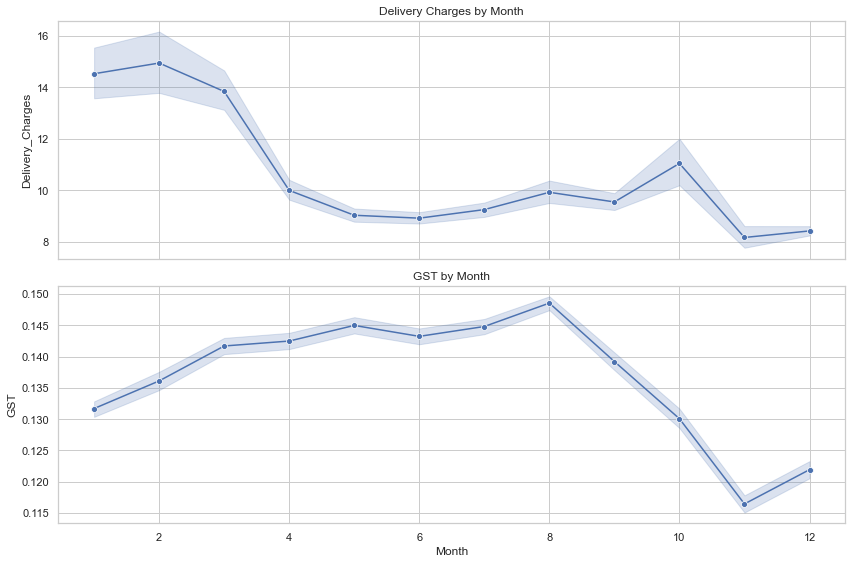

In [306]:
# Assuming 'Month', 'Quantity', and 'Avg_Price' are columns in your DataFrame df3
# If they are not present, adjust the column names accordingly

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Line plot for Quantity by Month
sns.lineplot(x="Month", y="Delivery_Charges", data=df3, ax=axs[0], marker='o')
axs[0].set_title('Delivery Charges by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Delivery_Charges')

# Line plot for Avg_Price by Month
sns.lineplot(x="Month", y="GST", data=df3, ax=axs[1], marker='o')
axs[1].set_title('GST by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('GST')

plt.tight_layout()
plt.show()


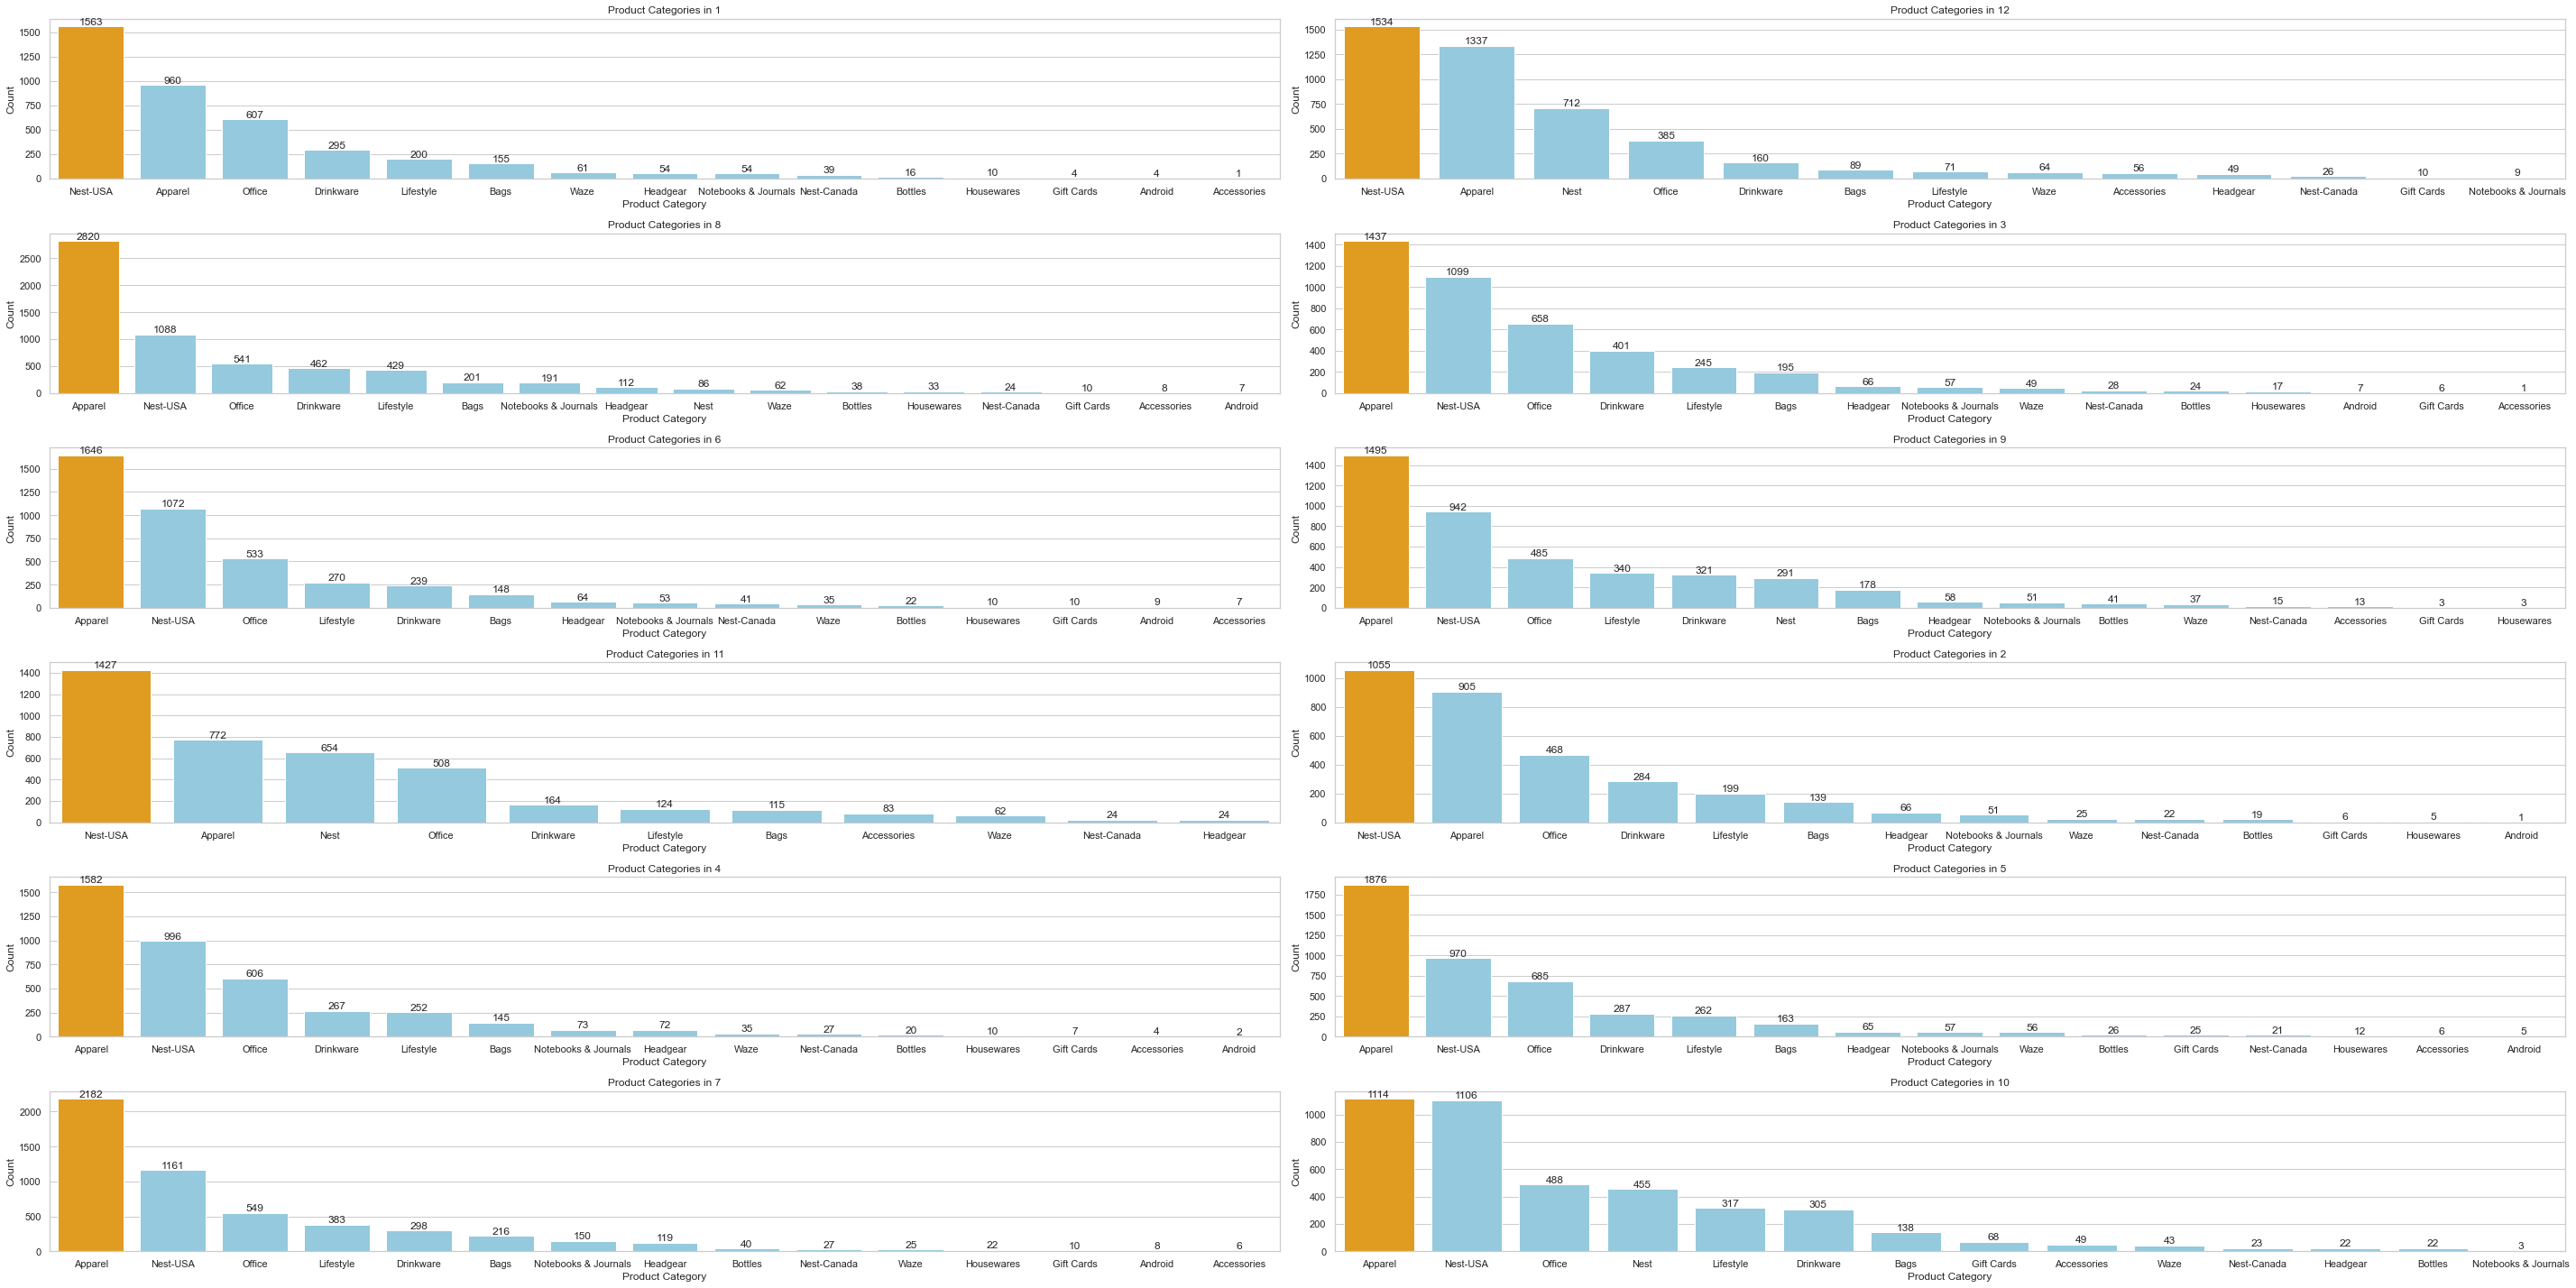

In [276]:
# Create a figure with subplots
fig, axs = plt.subplots(figsize=(40, 20), ncols=2, nrows=6)

# Get the unique categories in the 'Month' column
month_categories = df3['Month'].unique()
custom_colors = ['orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 
                'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue',
                'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue',
                'skyblue']
# Loop through each category and create countplots
for i, month in enumerate(month_categories):
    row = i // 2  # Adjust the number of columns specified in ncols
    col = i % 2
    
    # Filter data for the specific month category
    month_data = df3[df3['Month'] == month]
    
    # Sort the data by count in descending order
    sorted_data = month_data['Product_Category'].value_counts().sort_values(ascending=False).index
    month_data = month_data.sort_values(by='Product_Category', key=lambda x: x.map({cat: i for i, cat in enumerate(sorted_data)}))
    
    # Create countplot for each category
    graph = sns.countplot(x='Product_Category', data=month_data, ax=axs[row, col], palette=custom_colors)
    for container in graph.containers:
        graph.bar_label(container)
    
    # Add labels to the graph
    axs[row, col].set_title(f'Product Categories in {month}')
    axs[row, col].set_ylabel('Count')
    axs[row, col].set_xlabel('Product Category')  # Add x-axis label

# Adjust layout
plt.tight_layout()
plt.show()


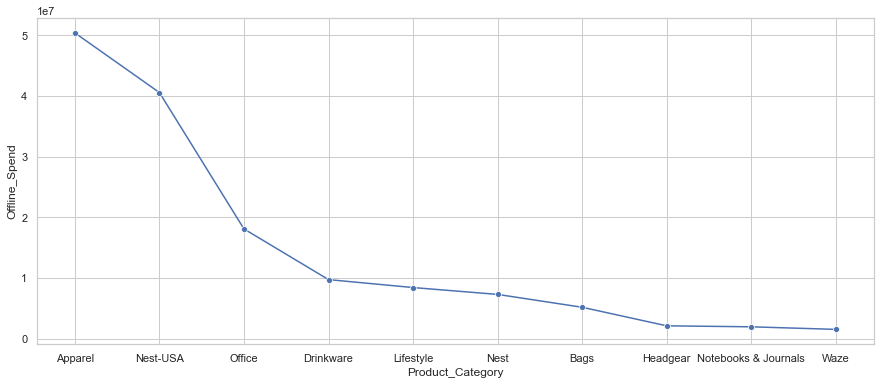

In [279]:
# top 10 category by Offline_Spend 

# create data frame call category
category = df3.groupby("Product_Category")["Offline_Spend"].sum().reset_index().sort_values(by = "Offline_Spend", ascending = False).head(10)

# set size of figure
plt.figure(figsize = (15,6))

# create bar plot 
sns.lineplot(x = "Product_Category", y = "Offline_Spend", data = category, marker = 'o')

plt.show()

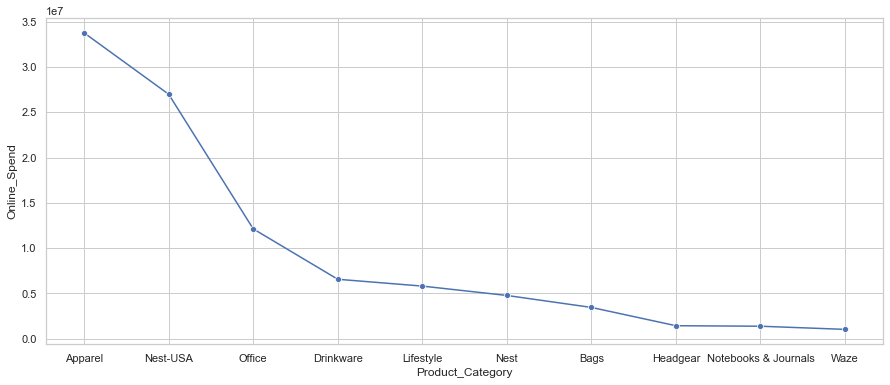

In [282]:
# top 10 category by Offline_Spend 

# create data frame call category
category = df3.groupby("Product_Category")["Online_Spend"].sum().reset_index().sort_values(by = "Online_Spend", ascending = False).head(10)

# set size of figure
plt.figure(figsize = (15,6))

# create bar plot 
sns.lineplot(x = "Product_Category", y = "Online_Spend", data = category, marker = 'o')

plt.show()

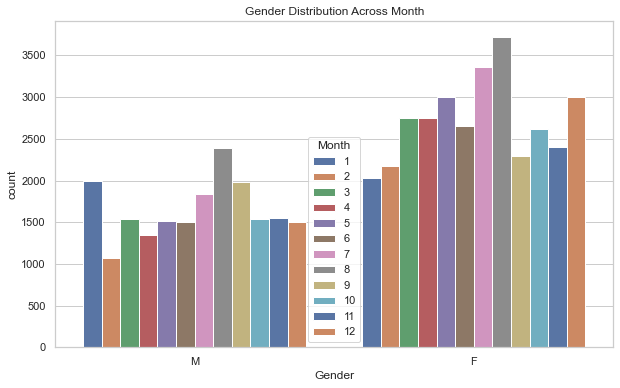

In [289]:
# set figure size
plt.figure(figsize=(10, 6))

# call the count_plot function using Seaborn
sns.countplot(x="Gender", hue="Month", data=df3, palette='deep')  # replace df3 with your actual DataFrame

# add title
plt.title('Gender Distribution Across Month')

# show the plot
plt.show()

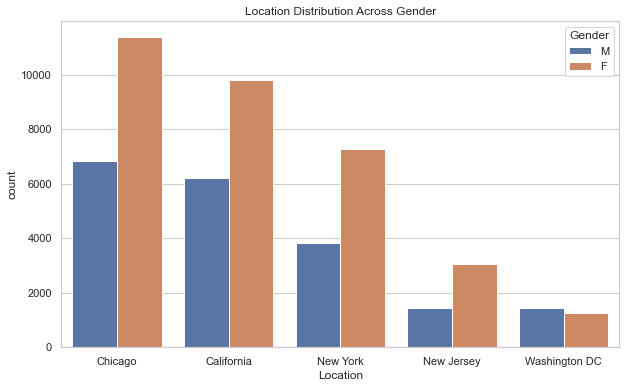

In [293]:
# set figure size
plt.figure(figsize=(10, 6))

# call the count_plot function using Seaborn
sns.countplot(x="Location", hue="Gender", data=df3)  # replace df3 with your actual DataFrame

# add title
plt.title('Location Distribution Across Gender')

# show the plot
plt.show()

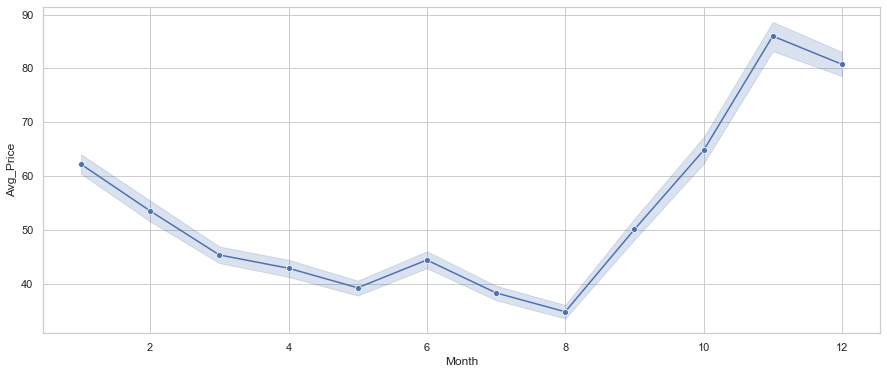

In [296]:
# Month VS Avg_Price

# set size of figure
plt.figure(figsize = (15,6))

# create line plot 
sns.lineplot(x = "Month", y = "Avg_Price", data = df3, marker = 'o')

plt.show()

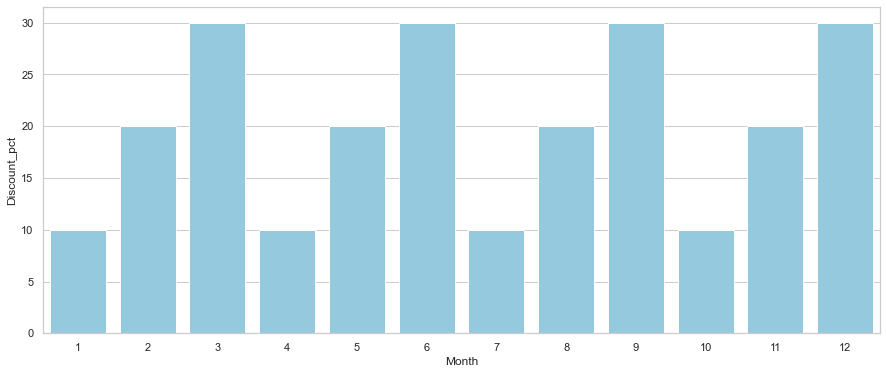

In [303]:
# Month VS Discount_pct

# set size of figure
plt.figure(figsize = (15,6))

# create line plot 
sns.barplot(x = "Month", y = "Discount_pct", data = df3, color = "skyblue")

plt.show()

## 🧩📊 Hasil yang Dicapai dari Analisis Univariat
Gender: Sebagian besar pelanggan adalah perempuan.

Lokasi: Jumlah pelanggan terbanyak berasal dari Chicago.

Tenure_Months: Rata-rata pelanggan terhubung dengan platform selama 26 bulan, dengan asosiasi yang paling umum adalah 40 bulan.

Product_Category: Penjualan tertinggi dikaitkan dengan kategori produk "Apparel".

Quantity: Distribusi jumlah yang dipesan cenderung miring positif, menunjukkan bahwa sebagian besar pelanggan cenderung memesan jumlah kecil, sementara beberapa pelanggan memesan dalam jumlah besar. Ini mungkin menunjukkan mayoritas pembeli individu dan mungkin beberapa pembelian dalam jumlah besar dari pedagang.

Avg_Price: Sebagian besar kategori memiliki harga rata-rata yang masuk akal untuk produk mereka.

Delivery_Charges: Beberapa pesanan memiliki biaya pengiriman nol, menunjukkan bahwa pesanan ini mungkin bukan pesanan tunggal dan mungkin disertai dengan barang lain. Atau, ini mungkin menunjukkan pengambilan barang di toko atau pembelian di lokasi penjualan tertentu.

GST: Pajak Barang dan Jasa yang diterapkan sangat kecil pada setiap transaksi.

Offline_Spend dan Online_Spend: Penjualan melalui toko fisik atau melalui transaksi manual cenderung menghasilkan keuntungan lebih tinggi dibandingkan penjualan online.

Month: Sebagian besar penjualan terjadi pada bulan kedelapan.

Discount_pct: Distribusi diskon pada produk cukup konsisten.

Bulan : Penjualan Tertinggi adalah bulan April

## 🧩📊 Hasil yang Dicapai dari Pertanyaan Bivariat
Data menunjukkan hubungan terbalik antara harga rata-rata dan jumlah yang terjual. Seiring meningkatnya harga rata-rata produk, jumlah yang terjual cenderung menurun. Korelasi terbalik ini menunjukkan bahwa pelanggan mungkin menunjukkan sensitivitas terhadap perubahan harga – ketika harga naik, jumlah produk yang terjual cenderung berkurang. Ini mungkin menunjukkan bahwa barang dengan harga tinggi mungkin memiliki permintaan atau daya tarik yang lebih rendah dibandingkan dengan barang dengan harga lebih rendah. Tren ini sejalan dengan prinsip dasar ekonomi tentang elastisitas harga, di mana harga yang lebih tinggi seringkali mengakibatkan permintaan atau jumlah penjualan yang lebih rendah.

Data menunjukkan adanya ketidaksesuaian atau inkonsistensi dalam hubungan antara tingkat diskon dan permintaan. Tampaknya semakin tinggi tingkat diskon yang ditawarkan pada produk, semakin besar permintaan untuk produk tersebut. Observasi ini bertentangan dengan harapan konvensional, karena diskon yang lebih tinggi biasanya menunjukkan permintaan yang lebih tinggi untuk produk yang didiskon. Namun, dalam dataset ini, tren menunjukkan perilaku yang tidak terduga di mana diskon yang lebih tinggi cenderung menarik lebih banyak permintaan, melenceng dari norma yang diharapkan di mana item yang didiskon biasanya mengalami penjualan yang lebih tinggi. Inkonsistensi ini mungkin memerlukan penyelidikan lebih lanjut untuk memahami perilaku dan pola pembelian pelanggan secara lebih komprehensif.

Diskon Tinggi: Beberapa produk menawarkan diskon 20 persen atau lebih. Diskon ini mungkin berfungsi sebagai insentif untuk menarik pelanggan dan kemungkinan memengaruhi keputusan pembelian, mendorong peningkatan volume penjualan untuk barang-barang yang didiskon ini.

Tanpa Diskon: Sebaliknya, ada produk dalam dataset yang tidak menawarkan diskon. Barang-barang ini mungkin mengandalkan strategi pemasaran lain atau daya tarik inheren daripada pengurangan harga untuk mendorong penjualan, menunjukkan pendekatan yang berbeda dalam penempatan produk atau penargetan pasar.

## DASHBOARD

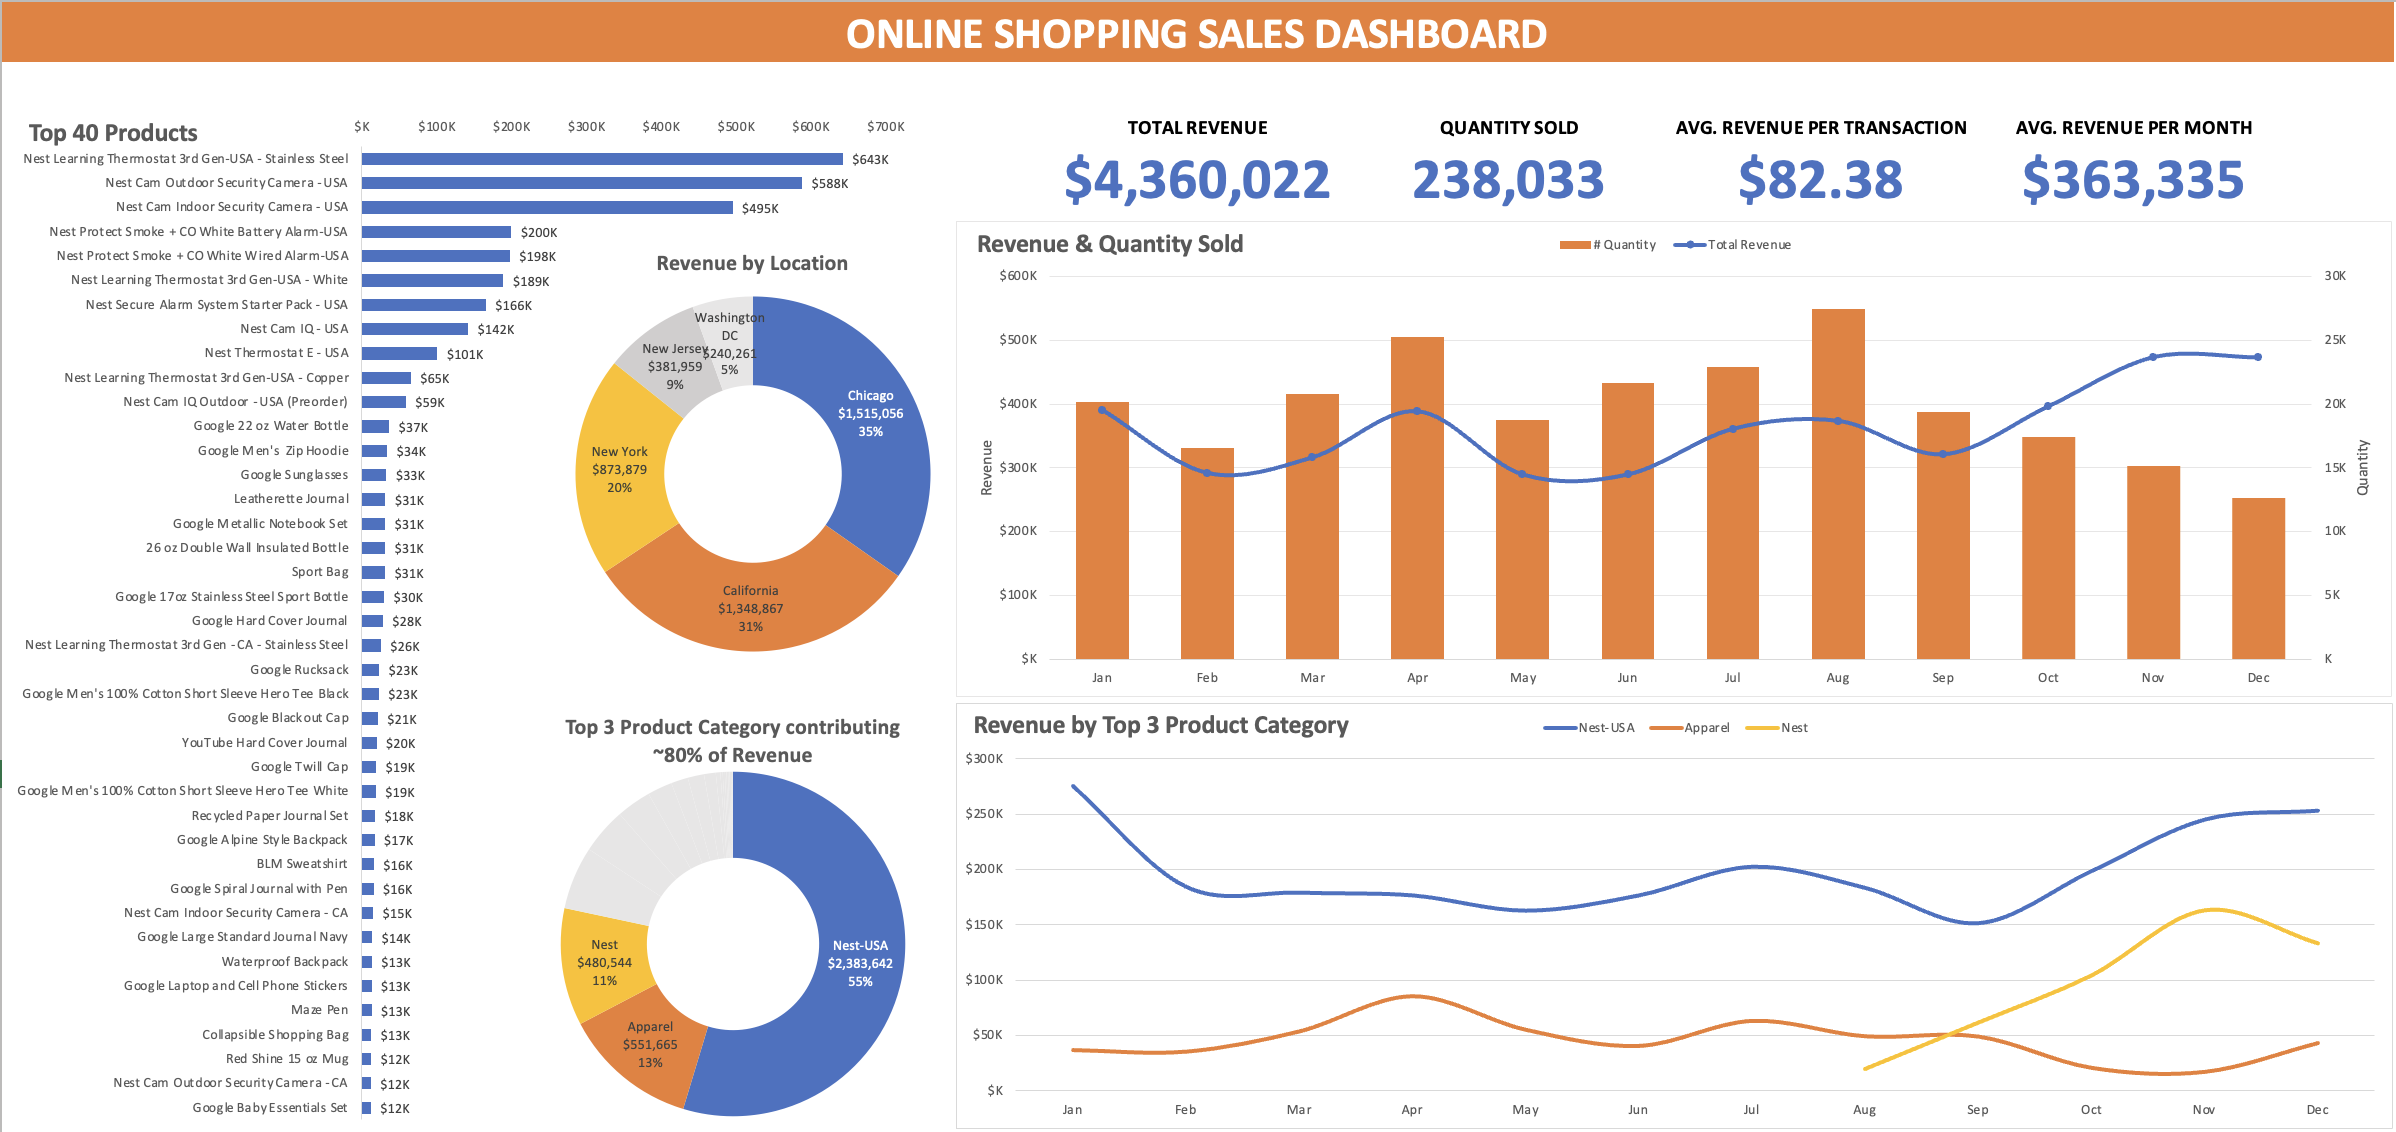

In [315]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path file gambar lokal
path_gambar = 'dashboard.png'  # Gantilah dengan path file gambar Anda

# Membaca gambar menggunakan matplotlib.image
gambar = mpimg.imread(path_gambar)

# Menampilkan gambar dengan IPython.display.Image
display(Image(filename=path_gambar))


## ANALISIS SELANJUTNYA ADALAH CLUSTERING(PEMBAGIAN) POLA HIDUP PELANGGAN MENGGUNAKAN AI